In [1]:
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 122kB 6.2MB/s eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    fo

In [2]:
paris_data = pd.read_csv("https://lvdesign.com.fr/coursera_data/paris.csv")
paris_data

,Lieux,Latitude,Longitude
0,Musée du Louvre,48.860611,2.335450
1,Notre Dame de Paris,48.852968,2.347708
2,Arc de Triomphe,48.873792,2.295028
3,Tour Eiffel,48.858370,2.294481


In [3]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [4]:
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Lieux']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='black',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

In [5]:
CLIENT_ID = 'XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF' # your Foursquare ID
CLIENT_SECRET = 'XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF
CLIENT_SECRET:XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO


In [6]:

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [7]:
paris_data_venues = getNearbyVenues(names=paris_data['Lieux'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )

Musée du Louvre
Notre Dame de Paris
Arc de Triomphe
Tour Eiffel


In [8]:
print(paris_data_venues.shape)
paris_data_venues

(252, 8)


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Musée du Louvre,48.860611,2.335450,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,Art Museum
1,Musée du Louvre,48.860611,2.335450,La Vénus de Milo (Vénus de Milo),5864efb745c3ed1e7d88e96d,48.859943,2.337234,Exhibit
2,Musée du Louvre,48.860611,2.335450,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,Historic Site
3,Musée du Louvre,48.860611,2.335450,Cour Carrée du Louvre,4c079d740ed3c928b6be797d,48.860360,2.338543,Pedestrian Plaza
4,Musée du Louvre,48.860611,2.335450,Cour Napoléon,5072efe7e4b0c34b5146e7fd,48.861172,2.335088,Plaza
5,Musée du Louvre,48.860611,2.335450,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",588ba9a9fc5a5f18a36a2a05,48.860724,2.332121,Art Museum
6,Musée du Louvre,48.860611,2.335450,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,Plaza
7,Musée du Louvre,48.860611,2.335450,Pont des Arts,4adcda09f964a520ff3321e3,48.858565,2.337635,Bridge
8,Musée du Louvre,48.860611,2.335450,Comédie-Française,4b48b4b0f964a5207c5326e3,48.863088,2.336612,Theater
9,Musée du Louvre,48.860611,2.335450,LouLou,57421b43498eb3b82c128e67,48.862804,2.333500,Italian Restaurant


In [9]:
paris_data_venues.groupby('Lieux').count()

,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Lieux,,,,,,,
Arc de Triomphe,75,75,75,75,75,75,75
Musée du Louvre,57,57,57,57,57,57,57
Notre Dame de Paris,72,72,72,72,72,72,72
Tour Eiffel,48,48,48,48,48,48,48


In [10]:

df_view = paris_data_venues.groupby('Lieux').count()
df_toto = df_view['Venue Category']
df_toto

Lieux
Arc de Triomphe        75
Musée du Louvre        57
Notre Dame de Paris    72
Tour Eiffel            48
Name: Venue Category, dtype: int64

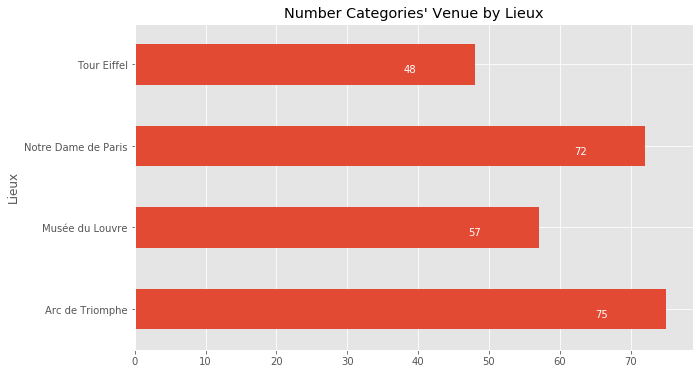

In [11]:
df_toto.plot(kind='barh', figsize=(10,6))

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Number Categories\' Venue by Lieux') # add title to the plot

for index, value in enumerate(df_toto): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

In [12]:
print('There are {} uniques categories.'.format(len(paris_data_venues['Venue Category'].unique())))
print(paris_data_venues['Venue Category'].unique() )

There are 100 uniques categories.
['Art Museum' 'Exhibit' 'Historic Site' 'Pedestrian Plaza' 'Plaza'
 'Bridge' 'Theater' 'Italian Restaurant' 'Shopping Mall' 'Smoke Shop'
 'Garden' 'Cosmetics Shop' 'Hotel' 'Café' 'Tea Room'
 'Furniture / Home Store' 'Church' 'French Restaurant' 'Coffee Shop'
 'Shoe Store' 'Perfume Shop' 'Udon Restaurant' 'Spa' 'Japanese Restaurant'
 'Museum' 'Clothing Store' 'Park' 'Dessert Shop' 'Sandwich Place'
 'Brasserie' 'Boutique' 'Arts & Crafts Store' 'Bookstore'
 'Tapas Restaurant' 'Lebanese Restaurant' 'Scenic Lookout'
 'Ice Cream Shop' 'Burger Joint' 'Comic Shop' 'Bakery' 'Cheese Shop'
 'Flower Shop' 'Hobby Shop' 'Fountain' 'Cocktail Bar' 'Bar' 'Pastry Shop'
 'Bistro' 'Pub' 'Diner' 'Chocolate Shop' 'Seafood Restaurant'
 'Miscellaneous Shop' 'Toy / Game Store' 'Falafel Restaurant' 'Sports Bar'
 'Market' "Men's Store" 'History Museum' 'Mexican Restaurant'
 'Indie Movie Theater' 'Supermarket' 'Beer Bar' 'Jewelry Store'
 'Bagel Shop' 'Vegetarian / Vegan Restauran

In [13]:
paris_onehot = pd.get_dummies(paris_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add Lieux column back to dataframe
paris_onehot['Lieux'] = paris_data_venues['Lieux'] 

# move lieux column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Beach Bar,Beer Bar,Bistro,Bookstore,Boutique,Brasserie,Breton Restaurant,Bridge,Burger Joint,Bus Stop,Café,Candy Store,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Historic Site,History Museum,Hobby Shop,Hotel,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant
0,Musée du Louvre,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
paris_grouped = paris_onehot.groupby('Lieux').mean().reset_index()
paris_grouped

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Beach Bar,Beer Bar,Bistro,Bookstore,Boutique,Brasserie,Breton Restaurant,Bridge,Burger Joint,Bus Stop,Café,Candy Store,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Historic Site,History Museum,Hobby Shop,Hotel,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant
0,Arc de Triomphe,0.000000,0.000000,0.013333,0.000000,0.013333,0.026667,0.000000,0.000000,0.000000,0.013333,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.000000,0.013333,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.026667,0.013333,0.000000,0.013333,0.000000,0.013333,0.013333,0.013333,0.000000,0.000000,0.000000,0.026667,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.080000,0.026667,0.026667,0.013333,0.013333,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.013333,0.000000,0.013333,0.026667,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.013333,0.026667,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.013333,0.000000,0.026667,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.013333
1,Musée du Louvre,0.052632,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.017544,0.017544,0.000000,0.017544,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.017544,0.000000,0.035088,0.000000,0.000000,0.000000,0.035088,0.000000,0.000000,0.017544,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.157895,0.017544,0.017544,0.052632,0.000000,0.000000,0.087719,0.000000,0.000000,0.035088,0.035088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.017544,0.000000,0.017544,0.017544,0.000000,0.000000,0.070175,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.017544,0.017544,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000
2,Notre Dame de Paris,0.000000,0.013889,0.000000,0.000000,0.000000,0.041667,0.027778,0.000000,0.013889,0.041667,0.069444,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.013889,0.000000,0.013889,0.041667,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.013889,0.027778,0.013889,0.111111,0.000000,0.013889,0.013889,0.013889,0.013889,0.027778,0.027778,0.041667,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.000000,0.013889,0.013889,0.013889,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.013889,0.013889,0.000000,0.000000,0.000000,0.055556,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.0138

In [15]:
num_top_venues = 20

for hood in paris_grouped['Lieux']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arc de Triomphe----
                         venue  freq
0                        Hotel  0.20
1            French Restaurant  0.16
2           Italian Restaurant  0.08
3          Japanese Restaurant  0.03
4               Sandwich Place  0.03
5               Clothing Store  0.03
6            Electronics Store  0.03
7                Jewelry Store  0.03
8                Movie Theater  0.03
9                   Steakhouse  0.03
10                      Bakery  0.03
11     Scandinavian Restaurant  0.01
12                   Roof Deck  0.01
13                    Creperie  0.01
14  Tourist Information Center  0.01
15            Sushi Restaurant  0.01
16         Sporting Goods Shop  0.01
17                         Spa  0.01
18            Kebab Restaurant  0.01
19                  Kids Store  0.01


----Musée du Louvre----
                     venue  freq
0        French Restaurant  0.16
1                    Hotel  0.09
2                    Plaza  0.07
3               Art Museum  0.05
4       

In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = paris_grouped['Lieux']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Arc de Triomphe,Hotel,French Restaurant,Italian Restaurant,Clothing Store,Sandwich Place,Jewelry Store,Japanese Restaurant,Electronics Store,Steakhouse,Movie Theater,Bakery,Candy Store,Moroccan Restaurant,Molecular Gastronomy Restaurant,Men's Store,Kids Store,Kebab Restaurant,Asian Restaurant,Bagel Shop,Bistro
1,Musée du Louvre,French Restaurant,Hotel,Plaza,Art Museum,Historic Site,Café,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Exhibit,Theater,Tea Room,Udon Restaurant,Museum,Park,Bridge,Pedestrian Plaza,Perfume Shop,Brasserie
2,Notre Dame de Paris,French Restaurant,Bookstore,Plaza,Indie Movie Theater,Bistro,Bakery,Coffee Shop,Burger Joint,Bar,Ice Cream Shop,Japanese Restaurant,Flower Shop,Lebanese Restaurant,Hotel,Cocktail Bar,Miscellaneous Shop,Pub,Church,Mexican Restaurant,Chocolate Shop
3,Tour Eiffel,French Restaurant,Italian Restaurant,Bakery,Hotel,Café,Garden,Plaza,Playground,Pizza Place,Pedestrian Plaza,Monument / Landmark,Library,Deli / Bodega,Romanian Restaurant,Convenience Store,Chinese Restaurant,Champagne Bar,Bus Stop,Brasserie,Beach Bar


In [18]:
kclusters = 3

paris_grouped_clustering = paris_grouped.drop('Lieux', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 2], dtype=int32)

In [19]:
paris_merged = paris_data

# add clustering labels
paris_merged['Cluster Labels'] = kmeans.labels_

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Lieux')
paris_merged 
# check the last columns!

,Lieux,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Musée du Louvre,48.860611,2.335450,0,French Restaurant,Hotel,Plaza,Art Museum,Historic Site,Café,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Exhibit,Theater,Tea Room,Udon Restaurant,Museum,Park,Bridge,Pedestrian Plaza,Perfume Shop,Brasserie
1,Notre Dame de Paris,48.852968,2.347708,1,French Restaurant,Bookstore,Plaza,Indie Movie Theater,Bistro,Bakery,Coffee Shop,Burger Joint,Bar,Ice Cream Shop,Japanese Restaurant,Flower Shop,Lebanese Restaurant,Hotel,Cocktail Bar,Miscellaneous Shop,Pub,Church,Mexican Restaurant,Chocolate Shop
2,Arc de Triomphe,48.873792,2.295028,1,Hotel,French Restaurant,Italian Restaurant,Clothing Store,Sandwich Place,Jewelry Store,Japanese Restaurant,Electronics Store,Steakhouse,Movie Theater,Bakery,Candy Store,Moroccan Restaurant,Molecular Gastronomy Restaurant,Men's Store,Kids Store,Kebab Restaurant,Asian Restaurant,Bagel Shop,Bistro
3,Tour Eiffel,48.858370,2.294481,2,French Restaurant,Italian Restaurant,Bakery,Hotel,Café,Garden,Plaza,Playground,Pizza Place,Pedestrian Plaza,Monument / Landmark,Library,Deli / Bodega,Romanian Restaurant,Convenience Store,Chinese Restaurant,Champagne Bar,Bus Stop,Brasserie,Beach Bar


In [20]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Lieux'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [22]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,48.860611,Hotel,Plaza,Art Museum,Historic Site,Café,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Exhibit,Theater,Tea Room,Udon Restaurant,Museum,Park,Bridge,Pedestrian Plaza,Perfume Shop,Brasserie


In [23]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
1,48.852968,Bookstore,Plaza,Indie Movie Theater,Bistro,Bakery,Coffee Shop,Burger Joint,Bar,Ice Cream Shop,Japanese Restaurant,Flower Shop,Lebanese Restaurant,Hotel,Cocktail Bar,Miscellaneous Shop,Pub,Church,Mexican Restaurant,Chocolate Shop
2,48.873792,French Restaurant,Italian Restaurant,Clothing Store,Sandwich Place,Jewelry Store,Japanese Restaurant,Electronics Store,Steakhouse,Movie Theater,Bakery,Candy Store,Moroccan Restaurant,Molecular Gastronomy Restaurant,Men's Store,Kids Store,Kebab Restaurant,Asian Restaurant,Bagel Shop,Bistro


In [24]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
3,48.85837,Italian Restaurant,Bakery,Hotel,Café,Garden,Plaza,Playground,Pizza Place,Pedestrian Plaza,Monument / Landmark,Library,Deli / Bodega,Romanian Restaurant,Convenience Store,Chinese Restaurant,Champagne Bar,Bus Stop,Brasserie,Beach Bar
